# Basic notions for studying fluids mechanics

* Emmanuel Cosme, August 2020

This notebook aims at illustrating some basic notions essential for the study of fluids mechanics:

* scalar fields and vector fields
* Differential operators: gradient, divergence, rotational

The theme is influenced by ocean dynamics. No need to know about these aspects to catch the essentials.

Understanding the python code is not essential to focus on theoretical notions and illustrations. However, sometimes the code helps understanding the theory.


## 0. Import standard python modules and define useful functions locally

### 0.1 Modules

In [1]:
import numpy as np
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline

Import useful functions from local module:

In [2]:
import utils as ut
help(ut)

Help on module utils:

NAME
    utils - Auxiliary functions used in several notebooks of the repo.

FUNCTIONS
    derivative(field, axis=0)
        Compute partial derivative along given axis using second-order centered scheme.
    
    divergence(u, v)
        Compute divergence of a 2D-vector with components u, v.
    
    gradient(field)
        Compute gradient of input scalar field.
    
    grid_param()
    
    laplacian(field)
        Compute Laplacian of field.
    
    make_grid()
        Make a 1000 x 800 km^2 grid with Nx x Ny grid points. Returns:
        * Nx, Ny
        * dx, dy: grid steps
        * xm, ym: meshgrid arrays
    
    make_sla(x, y)
        Create a 2D field with arbitrary analytical functions
    
    rotational(u, v)
        Compute vertical component of rotational of a 2D-vector with components u, v.
    
    set_boundaries_to_zero(field)
    
    von_neuman_euler(field, axis=None)
        Apply Von Neuman boundary conditions to the field.

DATA
    Lx 

## 1. Study of a scalar field: Sea Level Anomaly (SLA)

SLA is the anomaly of sea level with respect to the level averaged over a long time. SLA represents the variations of Sea Level due to dynamical processes (currents in particular). The equivalent quantity in the atmosphere is surface pressure anomaly, that is the deviation of pressure from the average 1013 hPa. 

### 1.1. Creation and first look at SLA
Here we create a 2-dimensional, rectangular, horizontal domain typically covering a small fraction of the ocean. We create a "synthetic" (not real), normalized SLA field displaying cyclonic and anticyclonic eddies. We plot this SLA field.

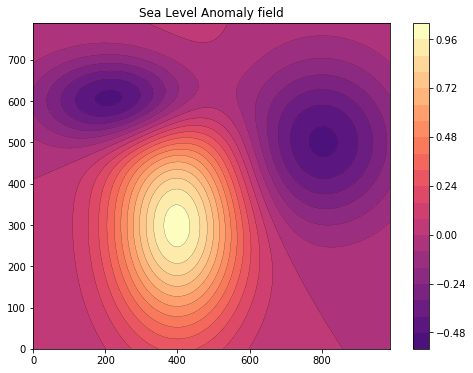

In [3]:
dx, Nx, Ny, xm, ym = ut.grid_param()
sla = ut.make_sla(xm,ym)

# Plot
vmin, vmax = -1, 1
plt.figure(figsize=(8, 6))
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
plt.contourf(xm, ym, sla, 20, vmin=vmin, vmax=vmax, cmap = "magma")
plt.title(label = "Sea Level Anomaly field")
plt.colorbar()

### Challenge 1

* What are the values of SLA at coordinates (400, 300)? (800, 300)? (400, 700)?
* Do you agree that SLA varies with both $x$ and $y$ coordinates and can be written SLA($x,y$)?

### 1.2. Computing the gradient of SLA

Here we compute the gradient of SLA:

In [4]:
gradx_sla, grady_sla = ut.gradient(sla)

Let's plot this vector field over the SLA (scalar) field:

Text(0.5, 1.0, 'Gradient of SLA')

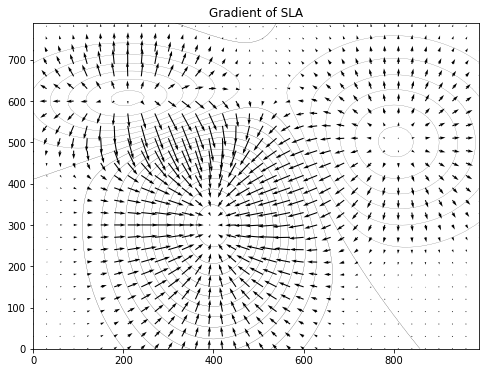

In [5]:
plt.figure(figsize=(8, 6))
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
slsp = 3  # slicing step
plt.quiver(xm[::slsp,::slsp], ym[::slsp,::slsp], gradx_sla[::slsp,::slsp], grady_sla[::slsp,::slsp], color="k")
plt.title(label = "Gradient of SLA")

### Challenge 2

* What are the thin black lines on this plot?
* What are the arrows?
* How are lines and arrows positioned with respect to each other?
* How do you connect the length of vectors with lines?

## 2. Study of a vector field: geostrophic velocity

In the ocean, geostrophic velocity (current speed) is defined as (with a few approximations not detailed here):
$$ u = - \frac{g}{f} \frac{\partial SLA}{\partial y}, \quad v = \frac{g}{f} \frac{\partial SLA}{\partial x} $$
where $g$ is gravity and $f$ the Coriolis factor, taken here at $10^{-4}$. $u$ represents the zonal (West to East) component of velocity, $v$ represents the meridional component (South to North). The components of geostrophic velocity are computed below and expressed in m/s. We also compute the absolute velocity.

In [6]:
u_geos = - 10/1e-4/1000 * ut.derivative(sla, axis=1)
v_geos =   10/1e-4/1000 * ut.derivative(sla, axis=0)
absuv  = np.sqrt( u_geos*u_geos + v_geos*v_geos )

### 2.1. A look at velocity

We plot $u$, $v$, absolute velocity and velocity vectors:

Text(0.5, 1.0, 'Velocity vector field')

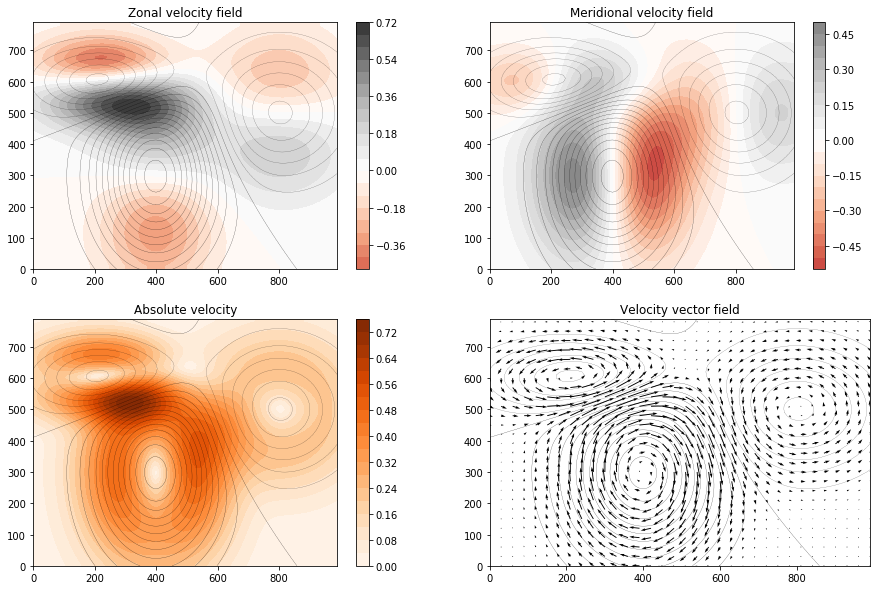

In [7]:
# Plot
vmin, vmax = -0.8, 0.8
plt.figure(figsize=(15, 10))

plt.subplot(221)
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
plt.contourf(xm, ym, u_geos, 20, vmin=vmin, vmax=vmax, cmap = "RdGy")
plt.title(label = "Zonal velocity field")
plt.colorbar()

plt.subplot(222)
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
plt.contourf(xm, ym, v_geos, 20, vmin=vmin, vmax=vmax, cmap = "RdGy")
plt.title(label = "Meridional velocity field")
plt.colorbar()

plt.subplot(223)
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
plt.contourf(xm, ym, absuv, 20, cmap = "Oranges")
plt.title(label = "Absolute velocity")
plt.colorbar()

plt.subplot(224)
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
slsp = 3  # slicing step
plt.quiver(xm[::slsp,::slsp], ym[::slsp,::slsp], u_geos[::slsp,::slsp], v_geos[::slsp,::slsp])
plt.title(label = "Velocity vector field")

### Challenge 3

* At $x$=400, meridional velocity exhibits 0 values separating a grey and a red blob. How do you connect this 0 value with SLA?
* Where is the maximum of absolute velocity? How do you connect this with SLA?
* Is this maximum mainly due to zonal or meridional velocity?
* How would you describe the SLA variations there?
* How are velocity vectors and SLA contours positioned with respect to each other?
* Compare the velocity field and the SLA gradient field. Can you base your observation on mathematical evidence?


### 2.2. Divergence and rotational of velocity

We compute and plot divergence and rotational of velocity, also called vorticity:

In [8]:
divuv = ut.divergence(u_geos, v_geos)
vort = ut.rotational(u_geos, v_geos)

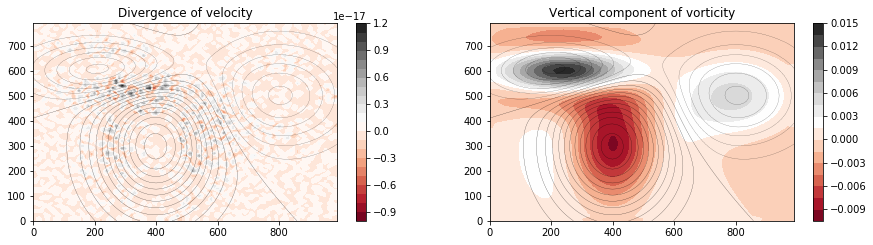

In [9]:
# Plot
plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
plt.contourf(xm, ym, divuv, 20, cmap = "RdGy")
plt.title(label = "Divergence of velocity")
plt.colorbar()

plt.subplot(222)
plt.contour(xm, ym, sla, 20, colors='black', linewidths = 0.2)
plt.contourf(xm, ym, vort, 20, cmap = "RdGy")
plt.title(label = "Vertical component of vorticity")
plt.colorbar()

### Challenge 4

* What is the order of magnitude of velocity divergence? Is the pattern somehow physically meaningful?
* Connect your previous observation with mathematical evidence by hand-computing the divergence of geostrophic velocity.
* Why do you only care about the vertical component of vorticity here?
* Where are the maxima and minima of vorticity, with respect to SLA?
* Can you formulate a mathematical interpretation of the previous observation?